In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Medical insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

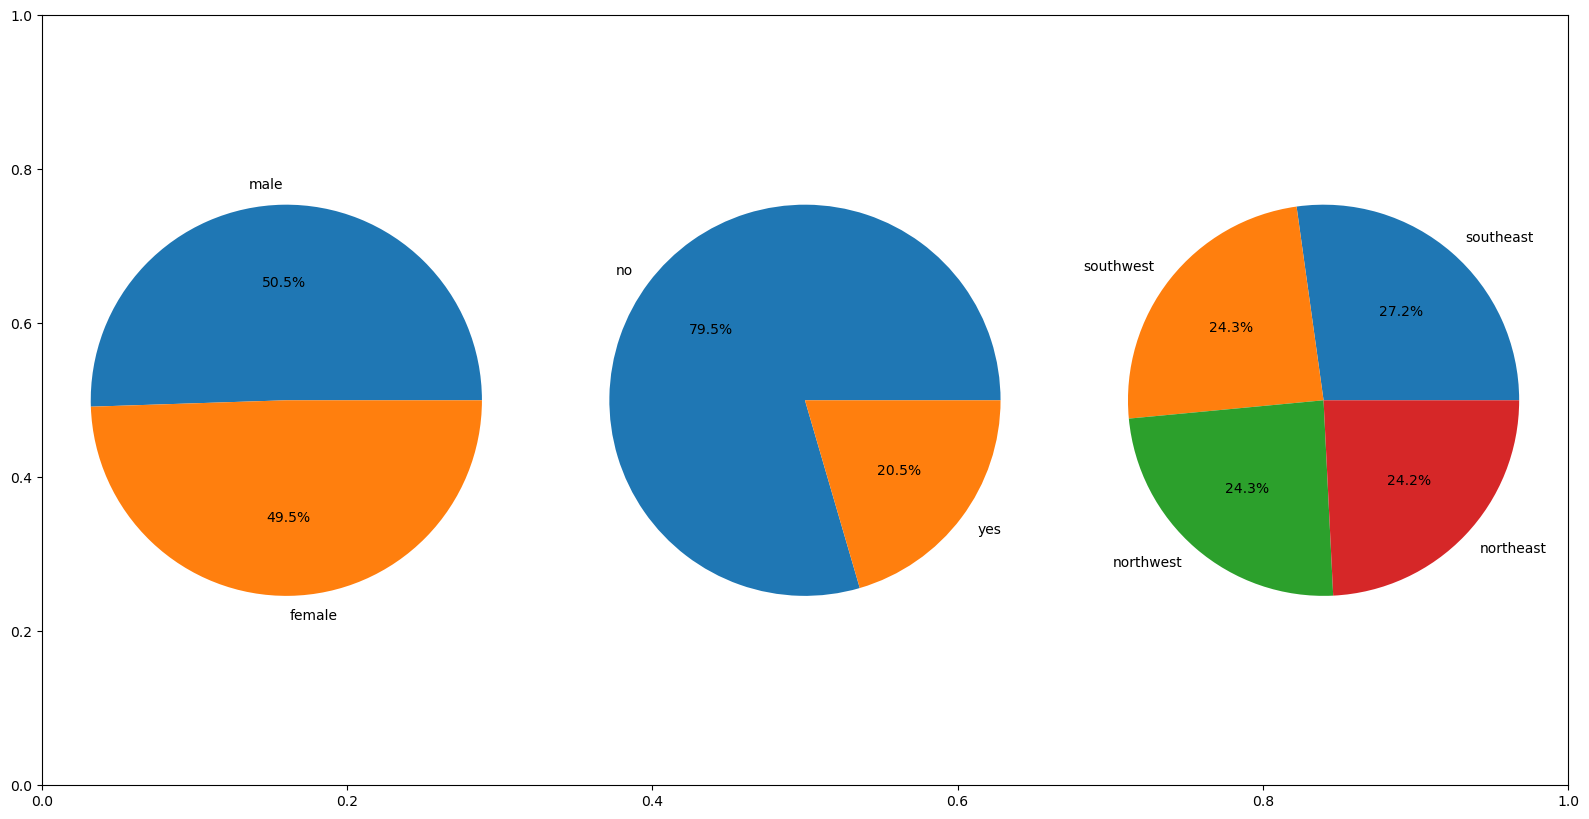

In [6]:
features = ['sex', 'smoker', 'region']
plt.subplots(figsize=(16, 8))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%.1f%%')
plt.tight_layout()

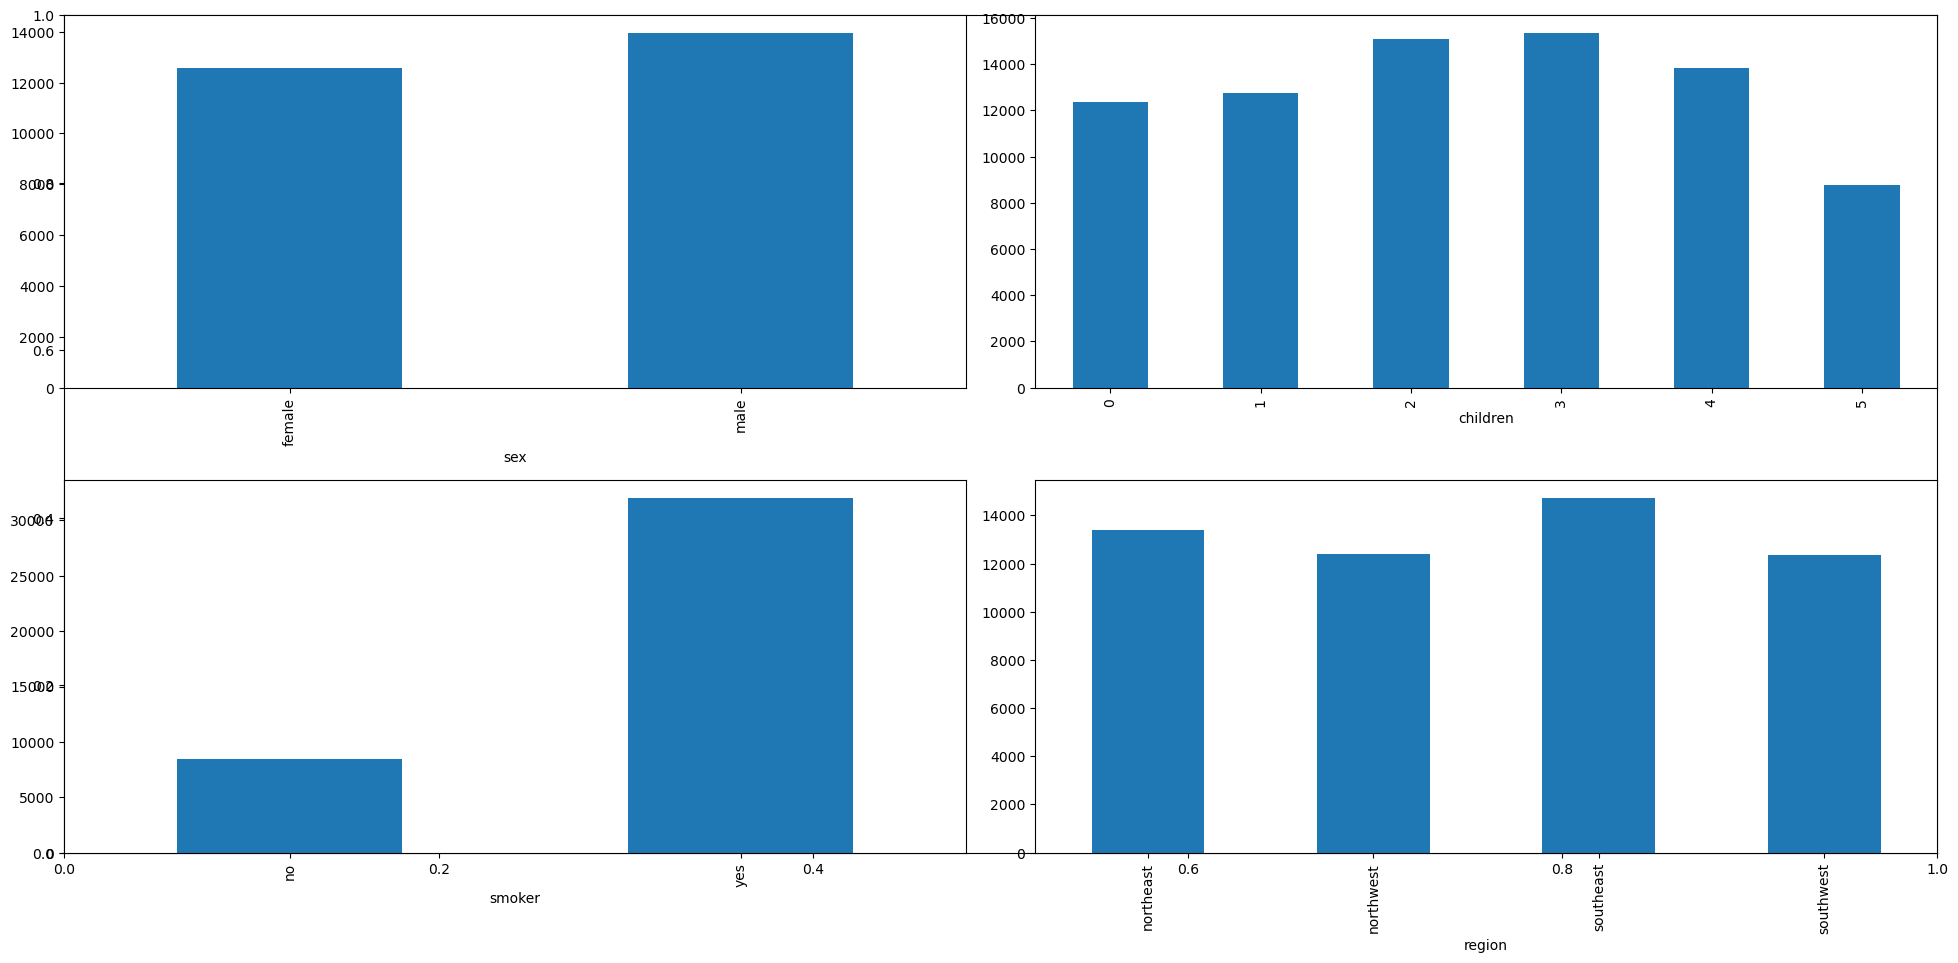

In [7]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.tight_layout()

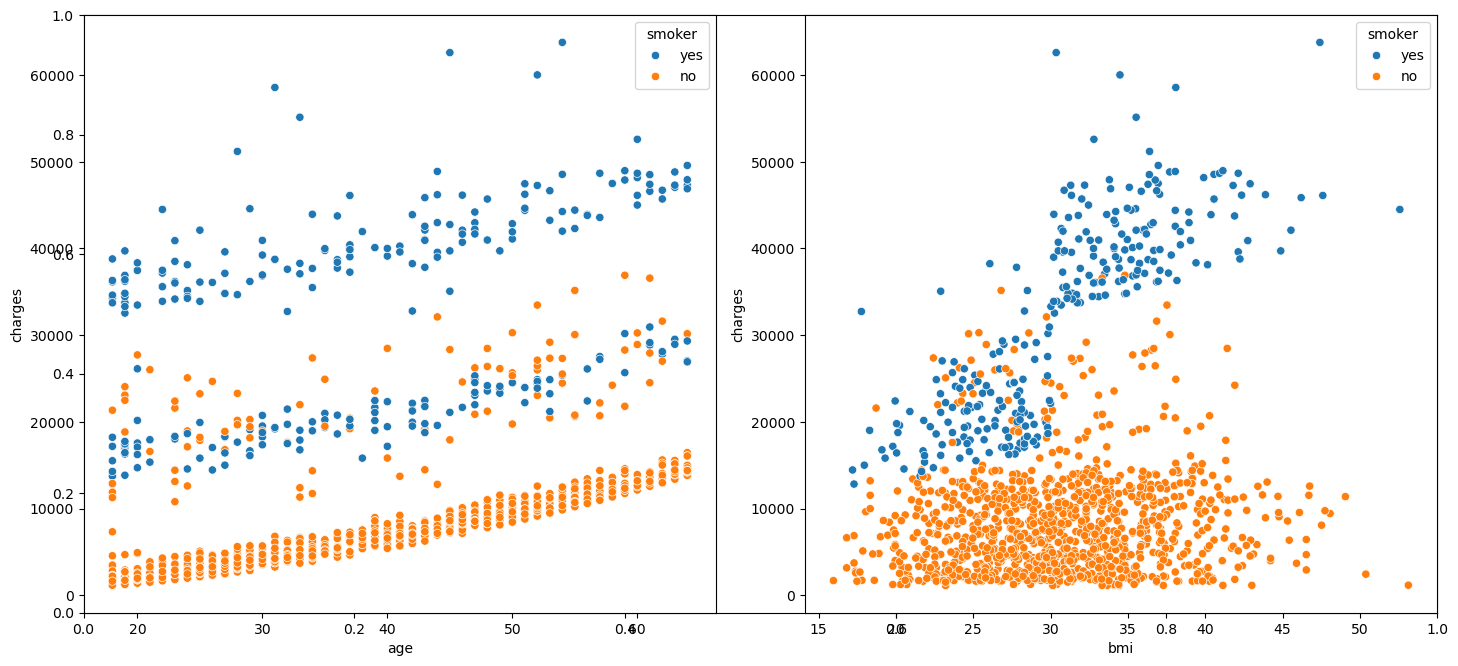

In [8]:
features = ['age', 'bmi']
plt.subplots(figsize=(15, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
plt.tight_layout()

In [9]:
df.duplicated().sum()

1

<Axes: ylabel='age'>

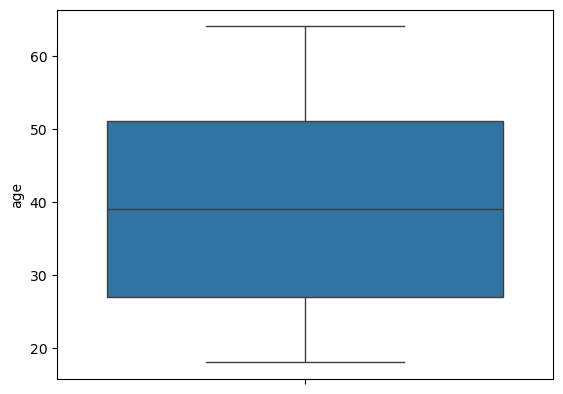

In [10]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

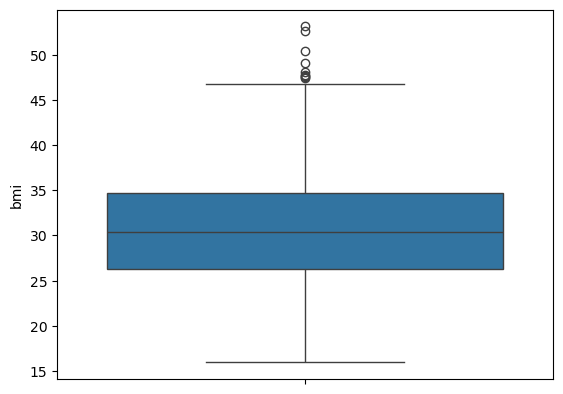

In [11]:
sns.boxplot(df['bmi'])

In [12]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


Defaulting to user installation because normal site-packages is not writeable


<Axes: ylabel='bmi'>

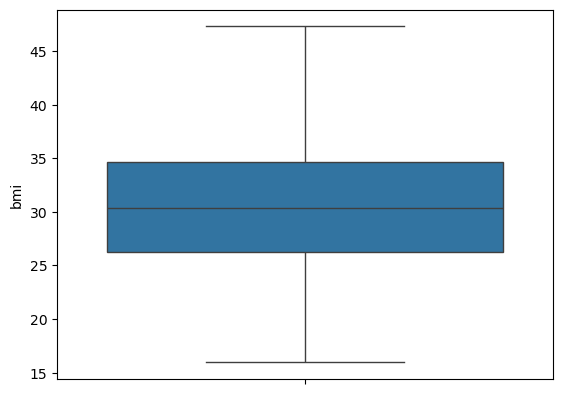

In [13]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [14]:
print(df['bmi'].skew())
print(df['age'].skew())

0.23289153320569975
0.054780773126998195


In [15]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [16]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

X = df.drop(['charges'], axis=1)
Y = df['charges']

lrmodel = LinearRegression()

train_scores = []
test_scores = []
cv_scores = []
random_states = []

for i in range(1, 100):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=i)
    lrmodel.fit(xtrain, ytrain)
    train_scores.append(lrmodel.score(xtrain, ytrain))
    test_scores.append(lrmodel.score(xtest, ytest))
    cvs = cross_val_score(lrmodel, X, Y, cv=5, scoring='r2').mean()
    cv_scores.append(cvs)
    random_states.append(i)

df1 = pd.DataFrame({'random_state': random_states,'training accuracy': train_scores,
    'testing accuracy': test_scores,'cross validation score': cv_scores})

max_index = df1['testing accuracy'].idxmax()
best_random_state = df1.loc[max_index, 'random_state']

print(df1)
print(f"The best random state based on the highest testing accuracy is:{best_random_state}")

    random_state  training accuracy  testing accuracy  cross validation score
0              1           0.747720          0.752362                 0.74707
1              2           0.758368          0.714933                 0.74707
2              3           0.747233          0.760660                 0.74707
3              4           0.754322          0.722855                 0.74707
4              5           0.757557          0.721065                 0.74707
..           ...                ...               ...                     ...
94            95           0.745154          0.769250                 0.74707
95            96           0.754755          0.727546                 0.74707
96            97           0.752591          0.740762                 0.74707
97            98           0.747508          0.759575                 0.74707
98            99           0.753876          0.731951                 0.74707

[99 rows x 4 columns]
The best random state based on the highes

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=best_random_state)

lrmodel = LinearRegression()

lrmodel.fit(xtrain, ytrain)

print("Training Accuracy (R²):", lrmodel.score(xtrain, ytrain))
print("Testing Accuracy (R²):", lrmodel.score(xtest, ytest))

cv_score = cross_val_score(lrmodel, X, Y, cv=5).mean()
print("Cross-Validation Score (R²):", cv_score)

Training Accuracy (R²): 0.7353124562315372
Testing Accuracy (R²): 0.813386542214521
Cross-Validation Score (R²): 0.7470697972809902


In [19]:
ytrain = ytrain.ravel()
ytest = ytest.ravel()

svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)

ypredtrain1 = svrmodel.predict(xtrain)
ypredtest1 = svrmodel.predict(xtest)

print("Training R² Score:", r2_score(ytrain, ypredtrain1))
print("Testing R² Score:", r2_score(ytest, ypredtest1))

cv_score = cross_val_score(svrmodel, X, Y, cv=5).mean()
print("Cross-Validation R² Score:", cv_score)

Training R² Score: -0.10344660559338514
Testing R² Score: -0.04810208852391917
Cross-Validation R² Score: -0.10374591327267262


In [20]:
from sklearn.model_selection import GridSearchCV

rfmodel = RandomForestRegressor(random_state=best_random_state)
rfmodel.fit(xtrain, ytrain)

ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)

print("R2 Score (Train):", r2_score(ytrain, ypredtrain2))
print("R2 Score (Test):", r2_score(ytest, ypredtest2))

cv_score = cross_val_score(rfmodel, X, Y, cv=5).mean()
print("Cross-validation Score:", cv_score)

param_grid = {'n_estimators': [100, 101, 102, 103, 104, 105, 106]}
grid = GridSearchCV(estimator=rfmodel, param_grid=param_grid, scoring="r2", cv=5)

grid.fit(xtrain, ytrain)

best_n_estimators = grid.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

rfmodel = RandomForestRegressor(random_state=best_random_state,
                                n_estimators=best_n_estimators)

rfmodel.fit(xtrain, ytrain)

ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)

final_r2_train = r2_score(ytrain, ypredtrain2)
final_r2_test = r2_score(ytest, ypredtest2)

print("Final R2 Score (Train):", final_r2_train)
print("Final R2 Score (Test):", final_r2_test)

final_cv_score = cross_val_score(rfmodel, X, Y, cv=5).mean()
print("Final Cross-validation Score:", final_cv_score)

R2 Score (Train): 0.9742671716374782
R2 Score (Test): 0.8812440088679081
Cross-validation Score: 0.836382896227661
Best n_estimators: 103
Final R2 Score (Train): 0.9741637411737063
Final R2 Score (Test): 0.8817879237778821
Final Cross-validation Score: 0.8362651215163253


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=best_random_state)

gbmodel = GradientBoostingRegressor()
gbmodel.fit(xtrain, ytrain)

ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

print("Initial R² on training set: ", r2_score(ytrain, ypredtrain3))
print("Initial R² on test set: ", r2_score(ytest, ypredtest3))

print("Initial cross-validation score: ", cross_val_score(gbmodel, X, Y, cv=5).mean())

param_grid = {'n_estimators': [25, 26, 27, 28, 29, 30, 50],
              'learning_rate': [0.1, 0.17, 0.18, 0.19, 0.2]}

grid = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)

best_params = grid.best_params_
print("Best parameters from GridSearchCV: ", best_params)

gbmodel = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                                    learning_rate=best_params['learning_rate'])
gbmodel.fit(xtrain, ytrain)

ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

print("Final R² on training set: ", r2_score(ytrain, ypredtrain3))
print("Final R² on test set: ", r2_score(ytest, ypredtest3))

print("Final cross-validation score: ", cross_val_score(gbmodel, X, Y, cv=5).mean())

Initial R² on training set:  0.8974948479647552
Initial R² on test set:  0.9011477527316939
Initial cross-validation score:  0.8552064283336016
Best parameters from GridSearchCV:  {'learning_rate': 0.17, 'n_estimators': 25}
Final R² on training set:  0.8731049553278343
Final R² on test set:  0.9193978581267357
Final cross-validation score:  0.8614876864515205


In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=best_random_state)

xgmodel = XGBRegressor()
xgmodel.fit(xtrain, ytrain)

ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

print("Initial R2 Score (Train):", r2_score(ytrain, ypredtrain4))
print("Initial R2 Score (Test):", r2_score(ytest, ypredtest4))

print("Initial Cross-validation Score:", cross_val_score(xgmodel, X, Y, cv=5).mean())

param_grid = {'n_estimators': [8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [2, 3, 4, 5],
              'gamma': [0, 0.15, 0.3, 0.5, 1]}

grid = GridSearchCV(estimator=xgmodel, param_grid=param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)

best_params = grid.best_params_
print("Best Parameters:", best_params)

xgmodel = XGBRegressor(n_estimators=best_params['n_estimators'],
                       max_depth=best_params['max_depth'], gamma=best_params['gamma'])

xgmodel.fit(xtrain, ytrain)

ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

print("Final R2 Score (Train):", r2_score(ytrain, ypredtrain4))
print("Final R2 Score (Test):", r2_score(ytest, ypredtest4))

final_cv_score = cross_val_score(xgmodel, X, Y, cv=5).mean()
print("Final Cross-validation Score:", final_cv_score)

Initial R2 Score (Train): 0.9943435534183813
Initial R2 Score (Test): 0.8441413944553195
Initial Cross-validation Score: 0.808125309217053
Best Parameters: {'gamma': 0, 'max_depth': 3, 'n_estimators': 11}
Final R2 Score (Train): 0.8665860288262388
Final R2 Score (Test): 0.9194757609525526
Final Cross-validation Score: 0.8606342089292026


In [23]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns,
                     columns=['Importance'])
feats.sort_values(by='Importance', ascending=False, inplace=True)
print(feats)

          Importance
smoker      0.837645
bmi         0.102013
age         0.041918
children    0.010388
region      0.006518
sex         0.001517


In [24]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
smoker,0.837645
bmi,0.102013
age,0.041918
children,0.010388


In [25]:
df.drop(['sex', 'region'], axis=1, inplace=True)

X = df.drop('charges', axis=1)
Y = df['charges']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=best_random_state)

finalmodel = XGBRegressor()

param_grid = {'n_estimators': [10, 11, 12, 13, 14, 15, 16],'max_depth': [1, 2, 3, 4],
              'gamma': [0, 0.1, 0.3]}

grid = GridSearchCV(finalmodel, param_grid, scoring='r2', cv=5)
grid.fit(xtrain, ytrain)

best_params = grid.best_params_
print("Best Parameters:", best_params)

finalmodel = XGBRegressor(n_estimators=best_params['n_estimators'],
                          max_depth=best_params['max_depth'],gamma=best_params['gamma'])

finalmodel.fit(xtrain, ytrain)

ypredtrain4 = finalmodel.predict(xtrain)
ypredtest4 = finalmodel.predict(xtest)

print("R2 Score (Train):", r2_score(ytrain, ypredtrain4))
print("R2 Score (Test):", r2_score(ytest, ypredtest4))

final_cv_score = cross_val_score(finalmodel, X, Y, cv=5).mean()
print("Cross-validation Score:", final_cv_score)

Best Parameters: {'gamma': 0, 'max_depth': 3, 'n_estimators': 13}
R2 Score (Train): 0.8677673657775247
R2 Score (Test): 0.9203922437962362
Cross-validation Score: 0.860839849322665


In [26]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))
print("Model saved to insurancemodelf.pkl")

Model saved to insurancemodelf.pkl


In [27]:
new_data = pd.DataFrame({'age': [19], 'bmi': [27.9], 'children': [0], 'smoker': ['yes']})

new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})

predictions = finalmodel.predict(new_data)
print("Predictions:", predictions)

Predictions: [18006.111]
